In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.scale as scale
import numpy as np
import math
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter
%matplotlib inline
#plt.rcParams.update({'font.size': 50})
#plt.rcParams.update({'lines.linewidth': 50})

In [2]:
file = r'D:\Project_Sugar_Removal\GlycosylationStatistics_git\GlycosylationStatisticsTest_Output\coconut_stats_moiety_frequencies_test\SugMoietyNrFrequencies.csv'
nr_moieties_df = pd.read_csv(file, header=0, sep=';')
print(nr_moieties_df)

    NrOfMoieties  Frequency
0              1      23780
1              2      11124
2              3       5936
3              4       3667
4              5       1870
5              6        923
6              7        355
7              8        254
8              9        119
9             10         52
10            11         23
11            12          8
12            13          4
13            14          3


<BarContainer object of 14 artists>

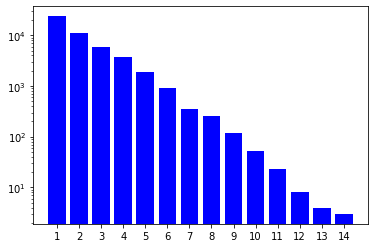

In [3]:
plt.bar(nr_moieties_df.get('NrOfMoieties'), nr_moieties_df.get('Frequency'), width = 0.8, color = "blue", bottom = 0, align = "center", tick_label = np.arange(1, len(nr_moieties_df)+1), log = True)

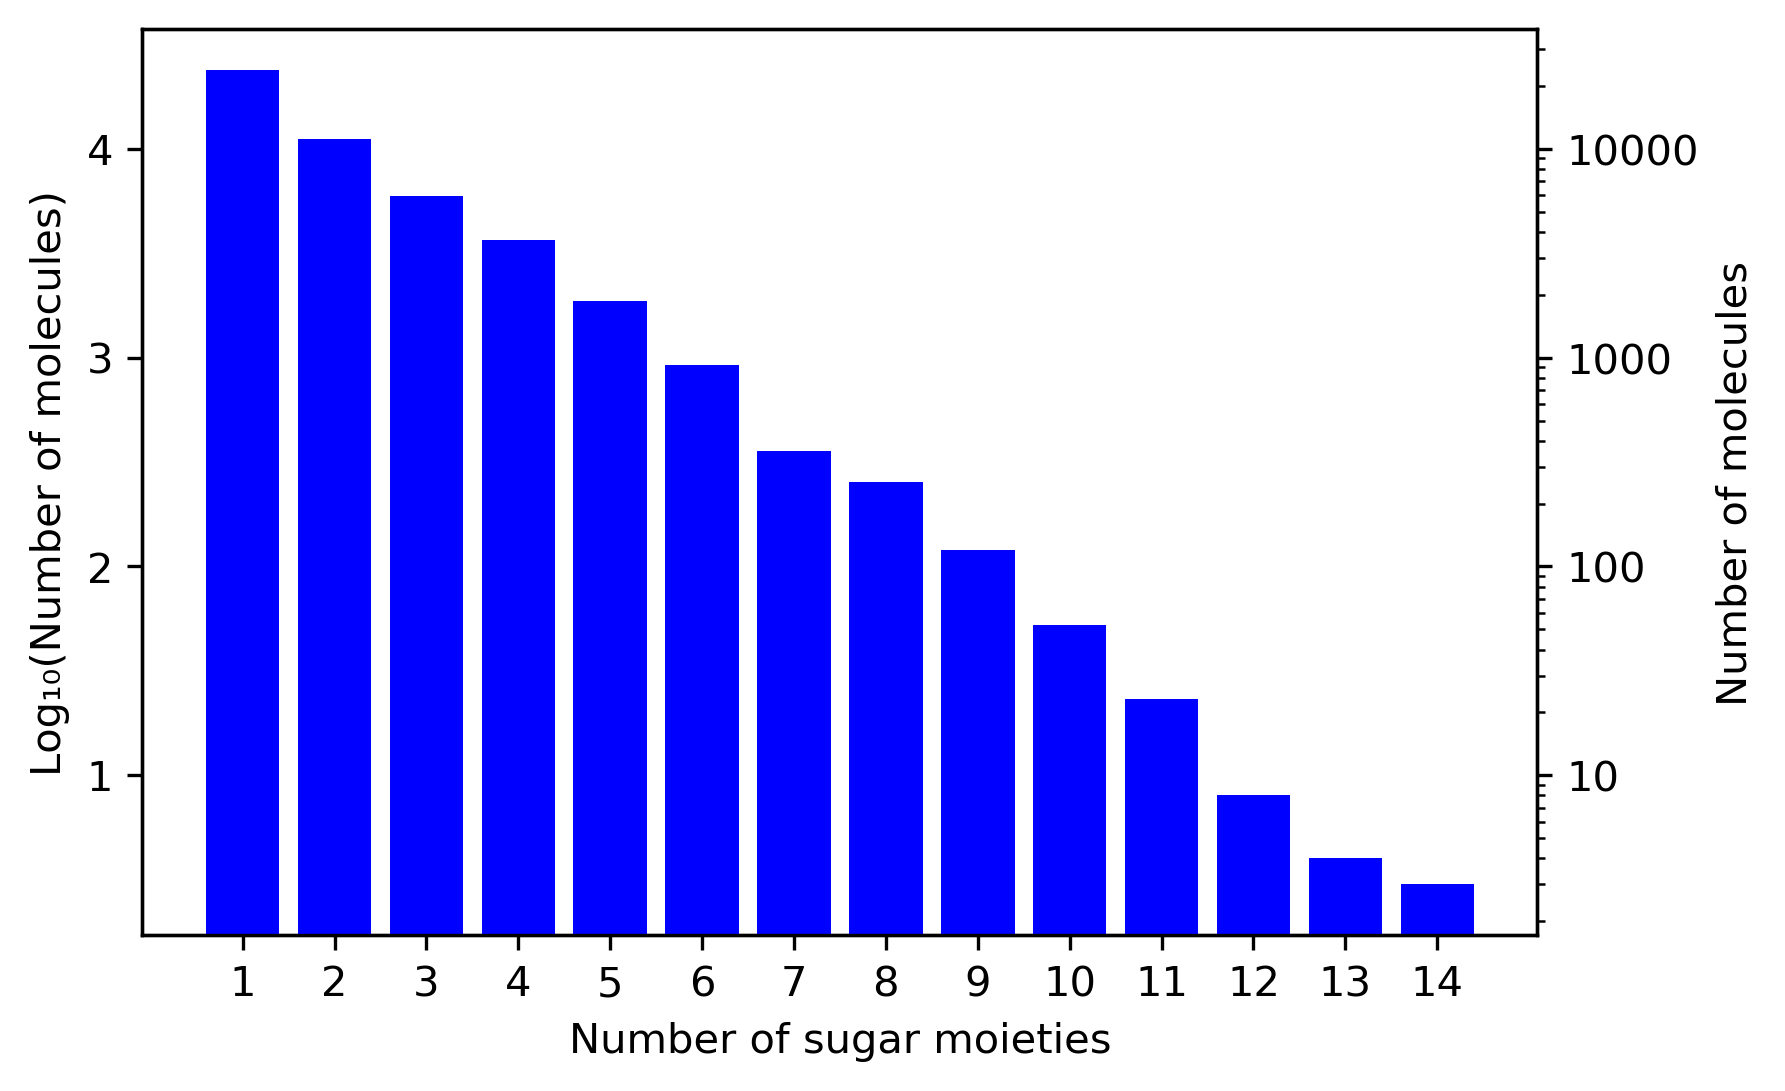

In [4]:
width = 0.8
fig, axLeft = plt.subplots(dpi=300)
axRight = axLeft.twinx()
for i in range(len(nr_moieties_df)):
    x = nr_moieties_df.loc[i,'NrOfMoieties']
    y = nr_moieties_df.loc[i,'Frequency']
    b = axLeft.bar(x, math.log(y, 10), color="blue", log=True, width=width, align="center")
    c = axRight.bar(x, y, color ="blue", log=True, width=width, align="center")
axLeft.set_xticks(nr_moieties_df.get('NrOfMoieties'))
axLeft.set_xlabel("Number of sugar moieties")
axLeft.set_yscale('linear')
axLeft.set_ylabel("Log\u2081\u2080(Number of molecules)")
axLeft.yaxis.set_major_locator(MaxNLocator(integer=True))
axRight.set_yscale('log',basey=10) 
axRight.set_ylabel("Number of molecules")
axRight.yaxis.set_major_formatter(ScalarFormatter())
plt.show()

In [5]:
fig.savefig("output\Distribution_number_of_moieties_per_molecule.jpeg", 
            dpi = fig.dpi, bbox_inches = "tight")
fig.savefig("output\Distribution_number_of_moieties_per_molecule.png", 
            dpi = fig.dpi, bbox_inches = "tight")

In [6]:
file = r'D:\Project_Sugar_Removal\GlycosylationStatistics_git\GlycosylationStatisticsTest_Output\coconut_stats_moiety_frequencies_test\CircSugMoietyNrFrequencies.csv'
nr_circular_moieties_df = pd.read_csv(file, header=0, sep=';')
print(nr_circular_moieties_df)
file = r'D:\Project_Sugar_Removal\GlycosylationStatistics_git\GlycosylationStatisticsTest_Output\coconut_stats_moiety_frequencies_test\LinSugMoietyNrFrequencies.csv'
nr_linear_moieties_df = pd.read_csv(file, header=0, sep=';')
print(nr_linear_moieties_df)

    NrOfCircMoieties  Frequency
0                  1      22901
1                  2      10961
2                  3       5913
3                  4       3661
4                  5       1879
5                  6        864
6                  7        347
7                  8        247
8                  9        119
9                 10         53
10                11         20
11                12          7
12                13          4
13                14          3
   NrOfLinMoieties  Frequency
0                1       1700
1                2         22
2                3          2
3                4          1


<BarContainer object of 14 artists>

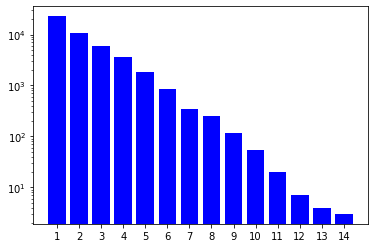

In [7]:
plt.bar(nr_circular_moieties_df.get('NrOfCircMoieties'), nr_circular_moieties_df.get('Frequency'), width = 0.8, color = "blue", bottom = 0, align = "center", tick_label = np.arange(1, len(nr_circular_moieties_df)+1), log = True)

<BarContainer object of 4 artists>

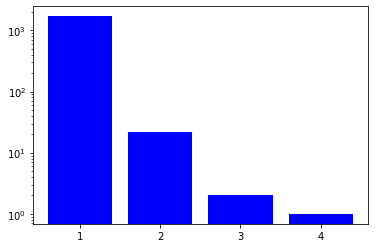

In [8]:
plt.bar(nr_linear_moieties_df.get('NrOfLinMoieties'), nr_linear_moieties_df.get('Frequency'), width = 0.8, color = "blue", bottom = 0, align = "center", tick_label = np.arange(1, len(nr_linear_moieties_df)+1), log = True)

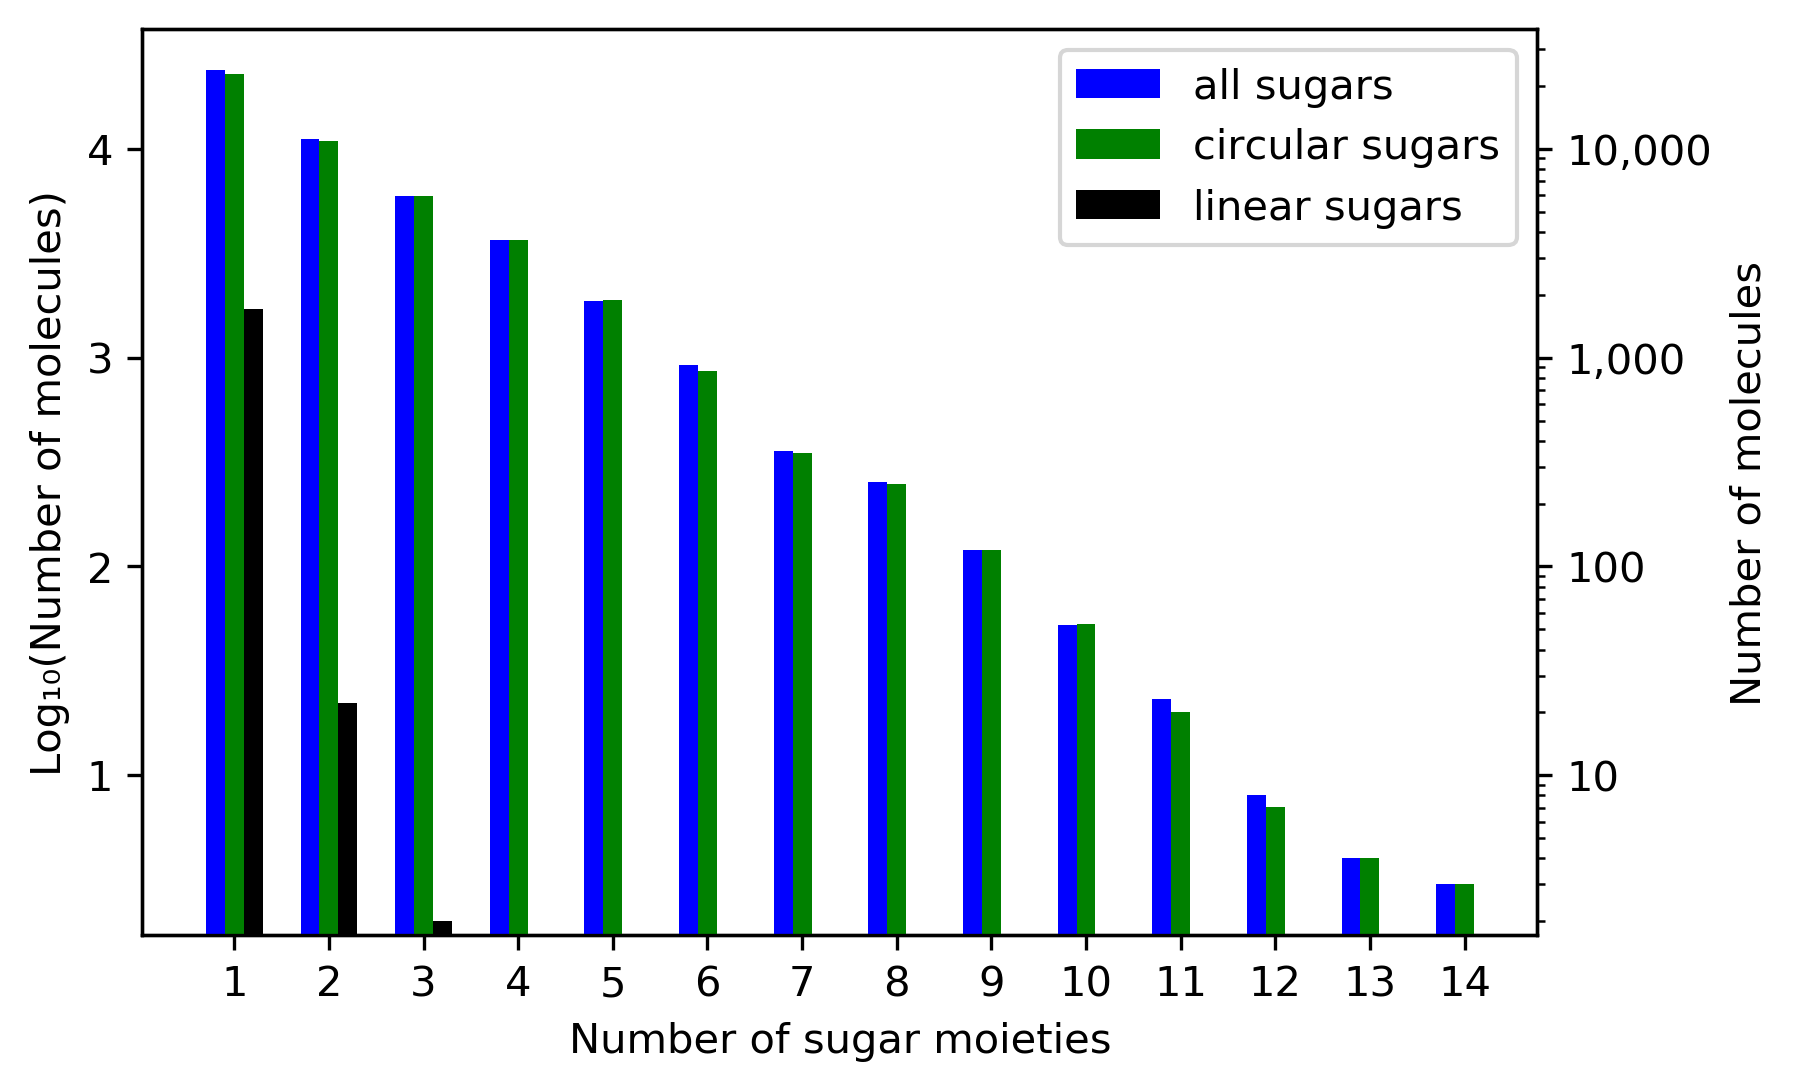

In [17]:
width = 0.2
offset = 0.2
fig, axLeft = plt.subplots(dpi=300)
axRight = axLeft.twinx()
for i in range(len(nr_moieties_df)):
    x = nr_moieties_df.loc[i,'NrOfMoieties']
    y = nr_moieties_df.loc[i,'Frequency']
    b = axLeft.bar(x-offset, math.log(y, 10), color="blue", log=True, width=width, align="center", label='all sugars')
    c = axRight.bar(x-offset, y, color ="blue", log=True, width=width, align="center")
    x = nr_circular_moieties_df.loc[i,'NrOfCircMoieties']
    y = nr_circular_moieties_df.loc[i,'Frequency']
    b = axLeft.bar(x, math.log(y, 10), color="green", log=True, width=width, align="center", label='circular sugars')
    c = axRight.bar(x, y, color ="green", log=True, width=width, align="center")
    if i < len(nr_linear_moieties_df):
        x = nr_linear_moieties_df.loc[i,'NrOfLinMoieties']
        y = nr_linear_moieties_df.loc[i,'Frequency']
        if y == 0:
            continue 
        if y == 1:
            continue
        b = axLeft.bar(x+offset, math.log(y, 10), color="black", log=True, width=width, align="center", label='linear sugars')
        c = axRight.bar(x+offset, y, color ="black", log=True, width=width, align="center")
axLeft.set_xticks(nr_moieties_df['NrOfMoieties'])
axLeft.set_xlabel("Number of sugar moieties")
axLeft.set_yscale('linear')
axLeft.set_ylabel("Log\u2081\u2080(Number of molecules)")
axLeft.yaxis.set_major_locator(MaxNLocator(integer=True))
axRight.set_yscale('log',basey=10) 
axRight.set_ylabel("Number of molecules")
axRight.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
axLeft.legend(['all sugars', 'circular sugars', 'linear sugars'])
plt.show()

In [18]:
fig.savefig("output\Distribution_number_of_moieties_per_molecule_detailed.jpeg", 
            dpi = fig.dpi, bbox_inches = "tight")
fig.savefig("output\Distribution_number_of_moieties_per_molecule_detailed.png", 
            dpi = fig.dpi, bbox_inches = "tight")

In [19]:
#Frequency distribution of exocyclic oxygen atoms to atoms in ring ratios of circular sugars
file = r'D:\Project_Sugar_Removal\GlycosylationStatistics_git\GlycosylationStatisticsTest_Output\coconut_stats_exocyclic_oxygens_test\ExoCycOxRatioFrequencies.csv'
freqs_oxygen_ratios_df = pd.read_csv(file, header=0, sep=';')
print(freqs_oxygen_ratios_df)

    Ratio  Frequency
0     0.0       5020
1     0.1       1904
2     0.2       2466
3     0.3       3956
4     0.4       2312
5     0.5      11311
6     0.6      85721
7     0.7          3
8     0.8       1149
9     0.9          0
10    1.0          3
11    1.1          0
12    1.2          0
13    1.3          2


<BarContainer object of 14 artists>

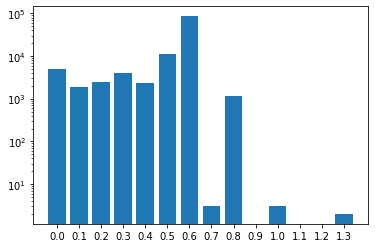

In [20]:
plt.bar(np.arange(0,len(freqs_oxygen_ratios_df)), freqs_oxygen_ratios_df.get('Frequency'), tick_label = freqs_oxygen_ratios_df.get('Ratio'), log = True, width=0.8)

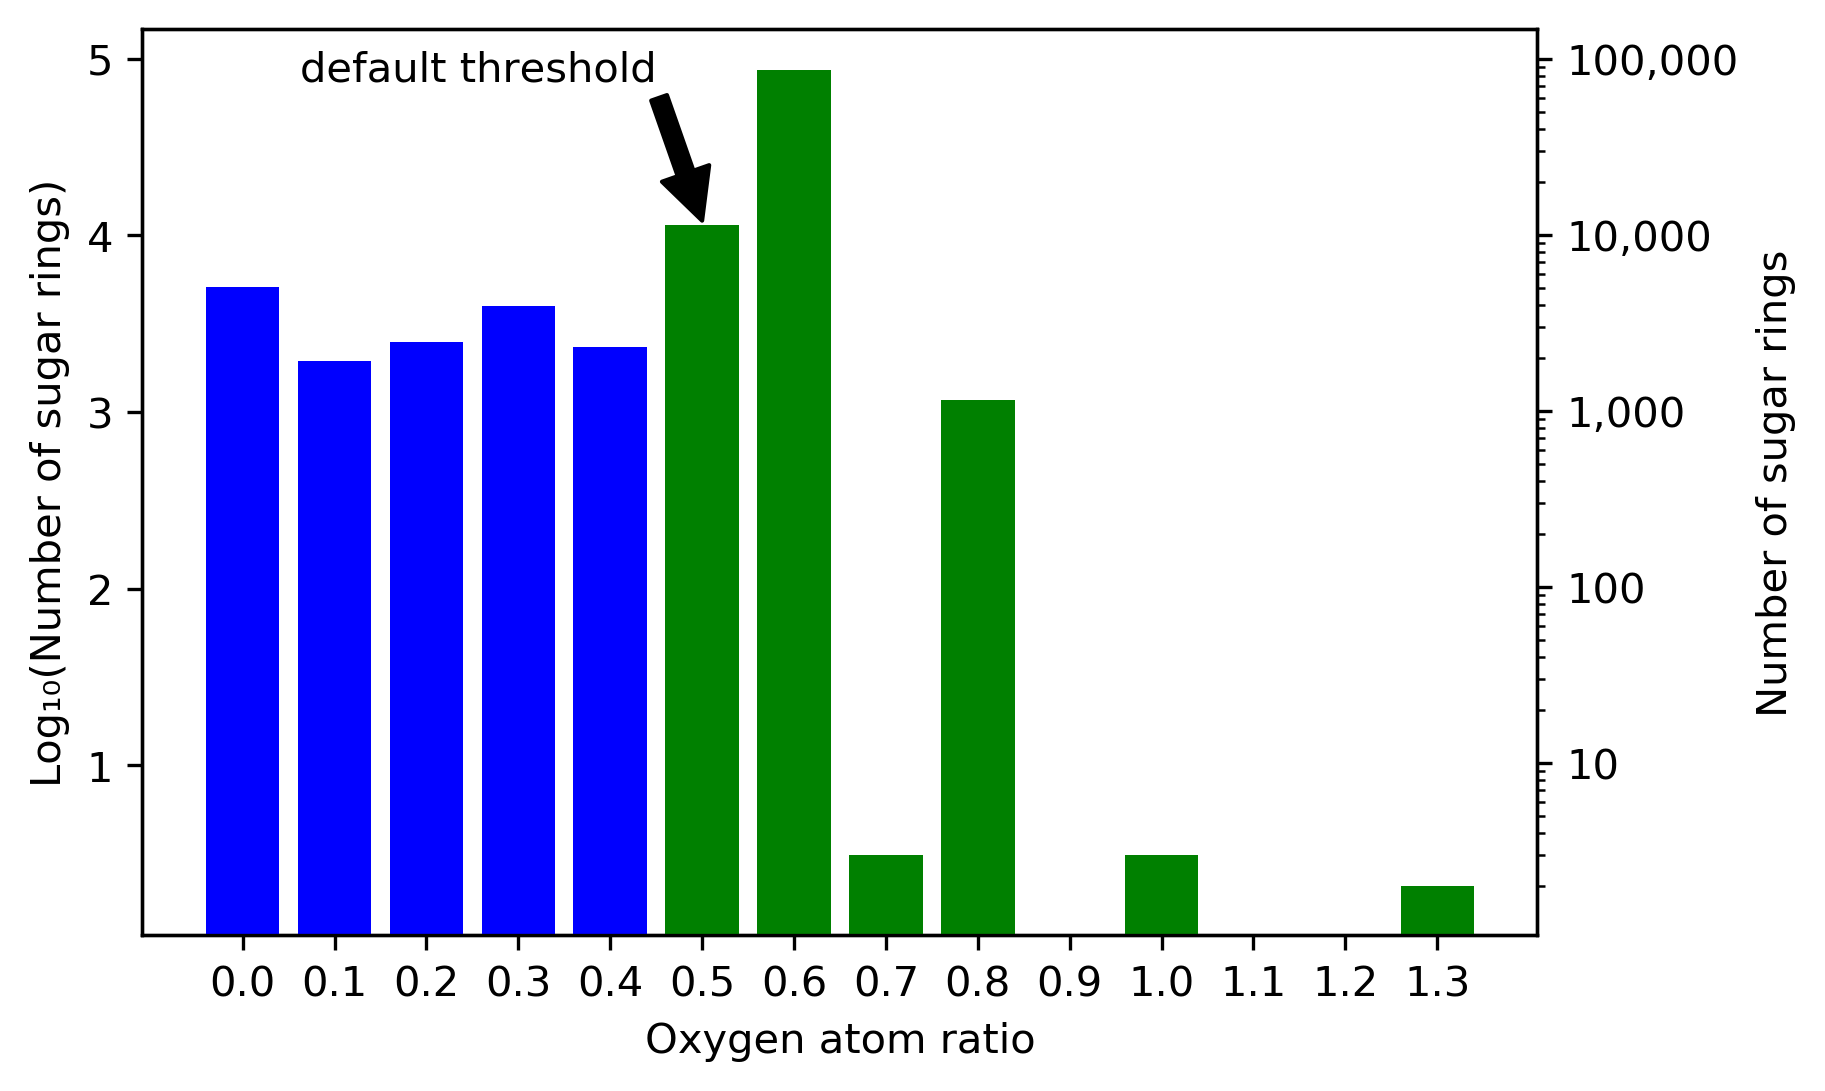

In [21]:
width = 0.08
fig, axLeft = plt.subplots(dpi=300)
axRight = axLeft.twinx()
for i in range(0,len(freqs_oxygen_ratios_df)):
    x = freqs_oxygen_ratios_df.loc[i,'Ratio']
    y = freqs_oxygen_ratios_df.loc[i,'Frequency']
    #exception is thrown when y == 0
    if y==0:
        continue
    if x < 0.5:
        color = "blue"
    else:
        color = "green"
    b = axLeft.bar(x, math.log(y, 10), color=color, log=True, width=width, align="center")
    c = axRight.bar(x, y, color=color, log=True, width=width, align="center")
axLeft.set_xticks(freqs_oxygen_ratios_df.get('Ratio'))
axLeft.set_xlabel("Oxygen atom ratio")
axLeft.set_yscale('linear')
axLeft.set_ylabel("Log\u2081\u2080(Number of sugar rings)")
axRight.set_yscale('log',basey=10) 
axRight.set_ylabel("Number of sugar rings")
axRight.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.annotate('default threshold',ha = 'right', va = 'bottom', xytext = (0.45,freqs_oxygen_ratios_df.loc[6,'Frequency']-19000),xy = (0.5, freqs_oxygen_ratios_df.loc[5,'Frequency']+700),arrowprops = {'facecolor' : 'black'})
plt.show()

In [22]:
fig.savefig("output\Distribution_oxygen_atom_ratio.jpeg", 
            dpi = fig.dpi, bbox_inches = "tight")
fig.savefig("output\Distribution_oxygen_atom_ratio.png", 
            dpi = fig.dpi, bbox_inches = "tight")